# Webscrapping ESPNcricinfo

I'm going to do web scraping of Website "https://www.espncricinfo.com/" Page. ESPNcricinfo is a sports news website exclusively for the game of cricket. The site features news, articles, live coverage of cricket matches, and StatsGuru, a database of historical matches and players from the 18th century to the present.

First we Import all the Important Packages that are required to do Web Scraping.
Numpy and Pandas are standard and I always import it, who knows when it come handy.

- Request: It is a Python module that you can use to send all kinds of HTTP requests. It is an easy-to-use library with a lot of features ranging from passing parameters in URLs to sending custom headers and SSL Verification.

- BeautifulSoup : It is a Python library for pulling data out of HTML and XML files. It works with your favorite parser to provide idiomatic ways of navigating, searching, and modifying the parse tree. It saves hours or days of work.

# ESPNcricinfo query

Given that our target match involves the following teams:

- India  
- Pakistan  
- Bangladesh  
- New Zealand  
- England  
- Australia  
- Afghanistan  
- South Africa

and will be held in **Pakistan** and **Dubai**, your query should be designed to extract data that is both team-specific and context-specific. Here's what you should focus on:

1. **Team and Opposition Filters:**  
   - **Select Teams:** Filter to include only matches involving the eight target teams.  

2. **Venue Filters:**  
   - **Home/Away:** Filter for matches played in **Pakistan** and **Dubai**. This will allow you to capture how teams perform in these specific conditions (pitch behavior, weather, etc.).  
   - **Ground:** If needed, you could narrow it down further by selecting specific grounds in Pakistan or Dubai that are regularly used for ODIs.

3. **Match Context Filters:**  
   - **Match Outcome & Toss Result:** Include filters for match outcomes and toss results, since these can affect team strategies and individual performances.  
   - **Batting or Fielding First:** Understanding whether teams batted or fielded first under these venues can be key to predicting performance.

4. **Player and Performance Metrics:**  
   - **Key Batting Metrics:** Runs scored, balls faced, strike rate, boundaries (fours & sixes), batting position, and dismissal details.  
   - **Bowling and Fielding Data:** Wickets taken, overs bowled, economy rate, catches, run outs, and stumpings—since these contribute to the fantasy points.
   - **Role-Specific Data:** If possible, identify player roles (batter, bowler, all-rounder, wicketkeeper) to ensure that team composition constraints are met.

5. **Time Period:**  
   - **Recent Form:** Emphasize data from recent seasons (e.g., last 5–10 years) to capture current form, but also consider historical performance if you need a larger sample size for more robust trends.

By querying for these data points, you'll obtain a dataset that reflects both the **performance metrics** and **contextual conditions** specific to the teams and venues in question. This will be crucial for building a predictive model that can effectively optimize your fantasy team selection for the upcoming match.

In [1]:
!pip3 install bs4 numpy pandas -q

# Query structure

In [2]:
import requests
import datetime
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

In [3]:
TEAM_CODES = {
    "India": "6",
    "Pakistan": "7",
    "Bangladesh": "25",
    "New Zealand": "5",
    "England": "1",
    "Australia": "2",
    "Afghanistan": "40",
    "South Africa": "3"
}

In [4]:
BASE_URL = "https://stats.espncricinfo.com/ci/engine/stats/index.html"

In [5]:
TIME_SPANS = []

for year in range(2010, 2024):
    for month in range(1, 13):
        start_date = datetime.date(year, month, 1)
        
        if month == 12:
            end_date = datetime.date(year + 1, 1, 1)
        else:
            end_date = datetime.date(year, month + 1, 1)
        
        start_date_str = start_date.strftime("%d+%b+%Y")
        end_date_str = end_date.strftime("%d+%b+%Y")
        
        TIME_SPANS.append((start_date_str, end_date_str))

In [31]:
# COmment out these lines when you are ready to scrape all data
# and adjust the time in above cells

TIME_SPANS = [
    ("01+Jan+2014", "01+Jan+2015"),  # from 1 Jan 2014 to 1 Jan 2015
    # ("01+Jan+2015", "01+Jan+2016"),  # from 1 Jan 2015 to 1 Jan 2016
]

In [7]:
TIME_SPANS[:10]

[('01+Jan+2014', '01+Jan+2015')]

In [8]:
len(TIME_SPANS)

1

In [9]:
HEADERS = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/119.0.0.0 Safari/537.36"
}

In [10]:
# Example URL response:
response = requests.get(
    "https://stats.espncricinfo.com/ci/engine/stats/index.html?class=2;filter=advanced;orderby=runs;spanmin1=01+Jan+2014;spanmax1=01+Jan+2015;spanval1=span;team=6;template=results;type=batting",
    headers={
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/119.0.0.0 Safari/537.36"
    }
)

print(response.text[:1000])


<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">
<!-- hostname: web04, edition-view: , country: unknown, cluster: www, created: 2025-02-02 12:02:23 -->
<html xmlns="http://www.w3.org/1999/xhtml" xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://opengraphprotocol.org/schema/" xmlns:fb="http://developers.facebook.com/schema/" >
<head>
 <script type="text/javascript">var _sf_startpt=(new Date()).getTime()</script>
 <meta name="google-site-verification" content="ZxdgH3XglRg0Bsy-Ho2RnO3EE4nRs53FloLS6fkt_nc" />
 <meta
        name="viewport"
        content="width=device-width, initial-scale=1.0, maximum-scale=1.0, user-scalable=0"
      />
 <title>Batting records | One-Day Internationals | Cricinfo Statsguru | ESPNcricinfo.com</title>
 <meta http-equiv="Content-Type" content="text/html;charset=utf-8" />
 <meta name="keywords" content="" />

 
 <meta name="description" content="" />
<!--[if IE 9]>
<script l

# Fetching data from ESPNcricinfo

### Documentation for Scraping Player Data

This script is used to scrape player statistics for required cricket teams over a given period from ESPN Cricinfo's Stats Engine. It fetches the batting statistics of players from different teams within specific time spans and organizes the data into a structured format for analysis.

---

#### Modules Used
- **requests**: To send HTTP requests and fetch the web page.
- **BeautifulSoup** (from `bs4`): To parse HTML and extract data.
- **pandas**: To structure the extracted data into DataFrames.
- **numpy**: To handle missing values and manage numerical operations.
- **datetime**: To generate the required time spans for the scraping process.

---

### Constants
- **TEAM_CODES**: A dictionary mapping cricket team names to their respective team codes used in the URL query string.
- **BASE_URL**: The base URL for the ESPN Cricinfo stats engine to fetch player data.
- **TIME_SPANS**: A list of tuples representing the time periods (start and end dates) for which player data is fetched. This is generated for every year from 2010 to 2023.

---

### Process Overview

1. **Setting Up Time Periods**:
    - The script generates monthly time spans (from January 2010 to December 2023) by iterating through each year and month, and storing them in the `TIME_SPANS` list.

2. **Headers for Request**:
    - A `User-Agent` header is used in the requests to mimic a request from a real browser, which is required for bypassing restrictions set by the website.

3. **Fetching Data**:
    - The main part of the script involves constructing a URL for each team and time period using the `TEAM_CODES` and `TIME_SPANS` lists.
    - The URL is constructed with parameters like:
        - Class type (`class=2` for batting),
        - Time period (`spanmin1`, `spanmax1` for the start and end dates),
        - Team code (`team` for the specific team),
        - Ordering parameter (`orderby=runs`),
        - Filter type (`filter=advanced`).
    - The script then sends an HTTP request to the URL and checks for a successful response (status code 200).

4. **Extracting Player Data**:
    - Once the HTML response is received, the `extract_player_data()` function is called to parse the data:
        - The function uses BeautifulSoup to search for tables with the class `engineTable`, which contain the player statistics.
        - It looks for the table with the caption "Overall figures" and extracts the player stats from the table rows.
        - If no such table is found, the function returns an empty DataFrame.
    - Extracted player data is structured into a pandas DataFrame.

5. **Storing Data**:
    - Data for each team and time period is appended to a global DataFrame `detailed_player_stats_bat`.
    - The data includes columns like "Mat" (matches), "Inns" (innings), "Runs", "100" (centuries), and more.

6. **Post-Processing**:
    - Missing values (represented as `"-"`) are replaced with NaN using `np.nan`.
    - Certain columns like "HS" (highest score), "Mat" (matches), and "Runs" are cleaned and converted to the appropriate data types.
    - Date columns "Start Date" and "End Date" are converted to pandas `datetime` format for easy analysis.

7. **Final Output**:
    - The script prints the total number of teams fetched and not fetched.
    - If no data is extracted for a particular time span and team, it is logged for reference.

In [11]:
def extract_player_data(html_response):
    soup = BeautifulSoup(html_response, "html.parser")
    tables = soup.find_all("table", {"class": "engineTable"})
    target_table = None
    
    # Find the table with the caption "Overall figures"
    for table in tables:
        caption = table.find("caption")
        if caption and caption.text.strip().lower() == "overall figures":
            target_table = table
            break
    
    # If no table is found, return an empty DataFrame
    if not target_table:
        return pd.DataFrame()

    # Extract headers from the table
    thead = target_table.find("thead")
    if not thead:
        return pd.DataFrame()
    
    headers = [th.text.strip() for th in thead.find_all("th")]

    # Extract rows from the table
    tbody = target_table.find("tbody")
    if not tbody:
        return pd.DataFrame()

    rows = []
    for tr in tbody.find_all("tr", {"class": "data1"}):
        cells = tr.find_all("td")
        row_data = [cell.text.strip() for cell in cells]
        rows.append(row_data)

    # Create and return a DataFrame
    return pd.DataFrame(rows, columns=headers)

## Batsmen

In [12]:
response = requests.get(
    "https://stats.espncricinfo.com/ci/engine/stats/index.html?class=2;filter=advanced;orderby=runs;spanmin1=01+Jan+2014;spanmax1=01+Jan+2015;spanval1=span;team=6;template=results;type=batting",
    headers={
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/119.0.0.0 Safari/537.36"
    }
)

player_data = extract_player_data(response.text)
if not player_data.empty:
    print(player_data.head())
else:
    print("No data extracted.")

      Player Mat Inns NO  Runs    HS    Ave    BF     SR 100 50  0  4s  6s  
0    V Kohli  21   20  2  1054  139*  58.55  1058  99.62   4  5  1  94  20  
1   S Dhawan  18   18  1   815   113  47.94   942  86.51   1  6  0  90  14  
2  AM Rahane  24   24  0   768   111  32.00   945  81.26   2  4  2  82  10  
3  AT Rayudu  20   18  5   584  121*  44.92   727  80.33   1  4  0  49  11  
4  RG Sharma  12   12  1   578   264  52.54   613  94.29   1  3  0  58  22  


In [13]:
detailed_player_stats_bat = pd.DataFrame()

count = 0
teams_fetched = 0
teams_not_fetched = 0

print("Webscraping started!")
print(f"Total iterations: {len(TIME_SPANS) * len(TEAM_CODES)}\n")

for (start_date, end_date) in TIME_SPANS:
    for team_name, team_code in TEAM_CODES.items():
        count += 1
        filter_params = [
            ("class", "2"),
            ("filter", "advanced"),
            ("orderby", "runs"),
            ("spanmin1", start_date),
            ("spanmax1", end_date),
            ("spanval1", "span"),
            ("team", team_code),
            ("template", "results"),
            ("type", "batting")
        ]

        query_string = ";".join(f"{k}={v}" for k, v in filter_params)
        url = f"{BASE_URL}?{query_string}"

        response = requests.get(url, headers=HEADERS)

        if response.status_code == 200:
            player_data = extract_player_data(response.text)

            if not player_data.empty:
                player_data["Team"] = team_name
                player_data["Start Date"] = start_date
                player_data["End Date"] = end_date
                detailed_player_stats_bat = pd.concat([detailed_player_stats_bat, player_data], ignore_index=True)
                teams_fetched += 1
            else:
                # print(f"No data extracted for {team_name} from {start_date} to {end_date}")
                teams_not_fetched += 1
        else:
            print(f"Failed to fetch data for {team_name} (Status code: {response.status_code})")
            teams_not_fetched += 1

        print(count, end=" ")


detailed_player_stats_bat.replace("-", np.nan, inplace=True)

if "HS" in detailed_player_stats_bat.columns:
    detailed_player_stats_bat["HS"] = (
        detailed_player_stats_bat["HS"].str.replace("*", "", regex=False).astype("Int64")
    )

# Convert integer columns
int_columns = ["Mat", "Inns", "NO", "Runs", "BF", "100", "50", "0", "4s", "6s"]
for col in int_columns:
    if col in detailed_player_stats_bat.columns:
        detailed_player_stats_bat[col] = (
            pd.to_numeric(detailed_player_stats_bat[col], errors="coerce").astype("Int64")
        )

# Convert float columns
float_columns = ["Ave", "SR"]
for col in float_columns:
    if col in detailed_player_stats_bat.columns:
        detailed_player_stats_bat[col] = (
            pd.to_numeric(detailed_player_stats_bat[col], errors="coerce").astype(float)
        )

detailed_player_stats_bat["Start Date"] = pd.to_datetime(detailed_player_stats_bat["Start Date"], format="%d+%b+%Y", errors="coerce")
detailed_player_stats_bat["End Date"] = pd.to_datetime(detailed_player_stats_bat["End Date"], format="%d+%b+%Y", errors="coerce")

print("\n\nWeb scraping completed!")

# 
# Summary
# 
print(f"\nTotal teams fetched: {teams_fetched}")
print(f"Total teams not fetched: {teams_not_fetched}")

Webscraping started!
Total iterations: 8

1 2 3 4 5 6 7 8 

Web scraping completed!

Total teams fetched: 8
Total teams not fetched: 0


## Bowlers

In [14]:
response = requests.get(
    "https://stats.espncricinfo.com/ci/engine/stats/index.html?class=2;filter=advanced;orderby=wickets;spanmin1=01+Jan+2014;spanmax1=01+Jan+2015;spanval1=span;team=6;template=results;type=bowling",
    headers={
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/119.0.0.0 Safari/537.36"
    }
)

player_data_bowl = extract_player_data(response.text)
if not player_data_bowl.empty:
    print(player_data_bowl.head())
else:
    print("No data extracted.")

           Player Mat Inns  Overs Mdns Runs Wkts   BBI    Ave  Econ    SR  4  \
0  Mohammed Shami  16   16  141.3    6  872   38  4/36  22.94  6.16  22.3  4   
1       RA Jadeja  17   17  160.0    6  817   25  4/28  32.68  5.10  38.4  2   
2        R Ashwin  17   17  161.5    8  768   23  3/31  33.39  4.74  42.2  0   
3        UT Yadav  10    9   71.2    3  381   17  4/53  22.41  5.34  25.1  1   
4         B Kumar  16   16  137.2   10  635   14  2/14  45.35  4.62  58.8  0   

   5    
0  0    
1  0    
2  0    
3  0    
4  0    


In [15]:
detailed_player_stats_bowl = pd.DataFrame()

count = 0
total_fetched = 0
total_not_fetched = 0

print("Web scraping started!")
print(f"Total iterations: {len(TIME_SPANS) * len(TEAM_CODES)}\n")

for (start_date, end_date) in TIME_SPANS:
    for team_name, team_code in TEAM_CODES.items():
        count += 1
        filter_params = [
            ("class", "2"),
            ("filter", "advanced"),
            ("orderby", "wickets"),
            ("spanmin1", start_date),
            ("spanmax1", end_date),
            ("spanval1", "span"),
            ("team", team_code),
            ("template", "results"),
            ("type", "bowling")
        ]

        query_string = ";".join(f"{k}={v}" for k, v in filter_params)
        url = f"{BASE_URL}?{query_string}"

        response = requests.get(url, headers=HEADERS)

        if response.status_code == 200:
            player_data = extract_player_data(response.text)

            if not player_data.empty:
                player_data["Team"] = team_name
                player_data["Start Date"] = start_date
                player_data["End Date"] = end_date
                detailed_player_stats_bowl = pd.concat([detailed_player_stats_bowl, player_data], ignore_index=True)
                total_fetched += 1
            else:
                total_not_fetched += 1
        else:
            print(f"Failed to fetch data for {team_name} (Status code: {response.status_code})")
            total_not_fetched += 1

        print(count, end=" ")

# Data Cleaning & Type Conversion
detailed_player_stats_bowl.replace("-", np.nan, inplace=True)

int_columns = ["Mat", "Inns", "Mdns", "Runs", "Wkts", "4", "5"]
for col in int_columns:
    if col in detailed_player_stats_bowl.columns:
        detailed_player_stats_bowl[col] = pd.to_numeric(detailed_player_stats_bowl[col], errors="coerce").astype("Int64")

float_columns = ["Ave", "Econ", "SR"]
for col in float_columns:
    if col in detailed_player_stats_bowl.columns:
        detailed_player_stats_bowl[col] = pd.to_numeric(detailed_player_stats_bowl[col], errors="coerce").astype(float)

detailed_player_stats_bowl["Start Date"] = pd.to_datetime(detailed_player_stats_bowl["Start Date"], format="%d+%b+%Y", errors="coerce")
detailed_player_stats_bowl["End Date"] = pd.to_datetime(detailed_player_stats_bowl["End Date"], format="%d+%b+%Y", errors="coerce")

print("\n\nWeb scraping completed!")
print(f"\nTotal teams fetched: {total_fetched}")
print(f"Total teams not fetched: {total_not_fetched}")

Web scraping started!
Total iterations: 8

1 2 3 4 5 6 7 8 

Web scraping completed!

Total teams fetched: 8
Total teams not fetched: 0


In [16]:
detailed_player_stats_bowl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Player      192 non-null    object        
 1   Mat         192 non-null    Int64         
 2   Inns        139 non-null    Int64         
 3   Overs       139 non-null    object        
 4   Mdns        139 non-null    Int64         
 5   Runs        139 non-null    Int64         
 6   Wkts        139 non-null    Int64         
 7   BBI         117 non-null    object        
 8   Ave         117 non-null    float64       
 9   Econ        138 non-null    float64       
 10  SR          117 non-null    float64       
 11  4           139 non-null    Int64         
 12  5           139 non-null    Int64         
 13              192 non-null    object        
 14  Team        192 non-null    object        
 15  Start Date  192 non-null    datetime64[ns]
 16  End Date    192 non-null  

In [17]:
detailed_player_stats_bowl.head()

,Player,Mat,Inns,Overs,Mdns,Runs,Wkts,BBI,Ave,Econ,SR,4,5,,Team,Start Date,End Date
0,Mohammed Shami,16,16,141.3,6,872,38,4/36,22.94,6.16,22.3,4,0,,India,2014-01-01,2015-01-01
1,RA Jadeja,17,17,160.0,6,817,25,4/28,32.68,5.10,38.4,2,0,,India,2014-01-01,2015-01-01
2,R Ashwin,17,17,161.5,8,768,23,3/31,33.39,4.74,42.2,0,0,,India,2014-01-01,2015-01-01
3,UT Yadav,10,9,71.2,3,381,17,4/53,22.41,5.34,25.1,1,0,,India,2014-01-01,2015-01-01
4,B Kumar,16,16,137.2,10,635,14,2/14,45.35,4.62,58.8,0,0,,India,2014-01-01,2015-01-01


## Fielders

In [18]:
# Example Usage:
response = requests.get(
    "https://stats.espncricinfo.com/ci/engine/stats/index.html?class=2;filter=advanced;orderby=runs;spanmin1=01+Jan+2014;spanmax1=01+Jan+2015;spanval1=span;team=6;template=results;type=fielding",
    headers={
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/119.0.0.0 Safari/537.36"
    }
)

fielder_data = extract_player_data(response.text)
if not fielder_data.empty:
    print(fielder_data.head())
else:
    print("No data extracted.")


      Player Mat Inns Dis  Ct St Ct Wk Ct Fi           MD    D/I  
0  AM Rahane  24   23  16  16  0     0    16  2 (2ct 0st)  0.695  
1   MS Dhoni  12   12  13   7  6     7     0  4 (2ct 2st)  1.083  
2    WP Saha   6    5  12  11  1    11     0  4 (4ct 0st)  2.400  
3   S Dhawan  18   18   9   9  0     0     9  2 (2ct 0st)  0.500  
4   SK Raina  17   16   9   9  0     0     9  2 (2ct 0st)  0.562  


In [19]:
detailed_player_stats_field = pd.DataFrame()

count = 0
teams_fetched = 0
teams_not_fetched = 0

print("Webscraping started!")
print(f"Total iterations: {len(TIME_SPANS) * len(TEAM_CODES)}\n")

for (start_date, end_date) in TIME_SPANS:
    for team_name, team_code in TEAM_CODES.items():
        count += 1
        filter_params = [
            ("class", "2"),
            ("filter", "advanced"),
            ("orderby", "runs"),
            ("spanmin1", start_date),
            ("spanmax1", end_date),
            ("spanval1", "span"),
            ("team", team_code),
            ("template", "results"),
            ("type", "fielding")
        ]

        query_string = ";".join(f"{k}={v}" for k, v in filter_params)
        url = f"{BASE_URL}?{query_string}"

        response = requests.get(url, headers=HEADERS)

        if response.status_code == 200:
            player_data = extract_player_data(response.text)

            if not player_data.empty:
                player_data["Team"] = team_name
                player_data["Start Date"] = start_date
                player_data["End Date"] = end_date
                detailed_player_stats_field = pd.concat([detailed_player_stats_field, player_data], ignore_index=True)
                teams_fetched += 1
            else:
                # print(f"No data extracted for {team_name} from {start_date} to {end_date}")
                teams_not_fetched += 1
        else:
            print(f"Failed to fetch data for {team_name} (Status code: {response.status_code})")
            teams_not_fetched += 1

        print(count, end=" ")


detailed_player_stats_field.replace("-", np.nan, inplace=True)

# Convert integer columns
int_columns = ["Mat", "Inns", "Dis", "Ct", "St", "Wk", "Fi"]
for col in int_columns:
    if col in detailed_player_stats_field.columns:
        detailed_player_stats_field[col] = (
            pd.to_numeric(detailed_player_stats_field[col], errors="coerce").astype("Int64")
        )

# Convert float columns
float_columns = ["D/I"]
for col in float_columns:
    if col in detailed_player_stats_field.columns:
        detailed_player_stats_field[col] = (
            pd.to_numeric(detailed_player_stats_field[col], errors="coerce").astype(float)
        )

detailed_player_stats_field["Start Date"] = pd.to_datetime(detailed_player_stats_field["Start Date"], format="%d+%b+%Y", errors="coerce")
detailed_player_stats_field["End Date"] = pd.to_datetime(detailed_player_stats_field["End Date"], format="%d+%b+%Y", errors="coerce")


print("\n\nWeb scraping completed!")

# 
# Summary
# 
print(f"\nTotal teams fetched: {teams_fetched}")
print(f"Total teams not fetched: {teams_not_fetched}")

Webscraping started!
Total iterations: 8

1 2 3 4 5 6 7 8 

Web scraping completed!

Total teams fetched: 8
Total teams not fetched: 0


In [20]:
detailed_player_stats_field.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Player      192 non-null    object        
 1   Mat         192 non-null    Int64         
 2   Inns        191 non-null    Int64         
 3   Dis         191 non-null    Int64         
 4   Ct          191 non-null    Int64         
 5   St          191 non-null    Int64         
 6   Ct Wk       191 non-null    object        
 7   Ct Fi       191 non-null    object        
 8   MD          191 non-null    object        
 9   D/I         191 non-null    float64       
 10              192 non-null    object        
 11  Team        192 non-null    object        
 12  Start Date  192 non-null    datetime64[ns]
 13  End Date    192 non-null    datetime64[ns]
dtypes: Int64(5), datetime64[ns](2), float64(1), object(6)
memory usage: 22.1+ KB


In [21]:
detailed_player_stats_field.head()

,Player,Mat,Inns,Dis,Ct,St,Ct Wk,Ct Fi,MD,D/I,,Team,Start Date,End Date
0,AM Rahane,24,23,16,16,0,0,16,2 (2ct 0st),0.695,,India,2014-01-01,2015-01-01
1,MS Dhoni,12,12,13,7,6,7,0,4 (2ct 2st),1.083,,India,2014-01-01,2015-01-01
2,WP Saha,6,5,12,11,1,11,0,4 (4ct 0st),2.400,,India,2014-01-01,2015-01-01
3,S Dhawan,18,18,9,9,0,0,9,2 (2ct 0st),0.500,,India,2014-01-01,2015-01-01
4,SK Raina,17,16,9,9,0,0,9,2 (2ct 0st),0.562,,India,2014-01-01,2015-01-01


# Data overview

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

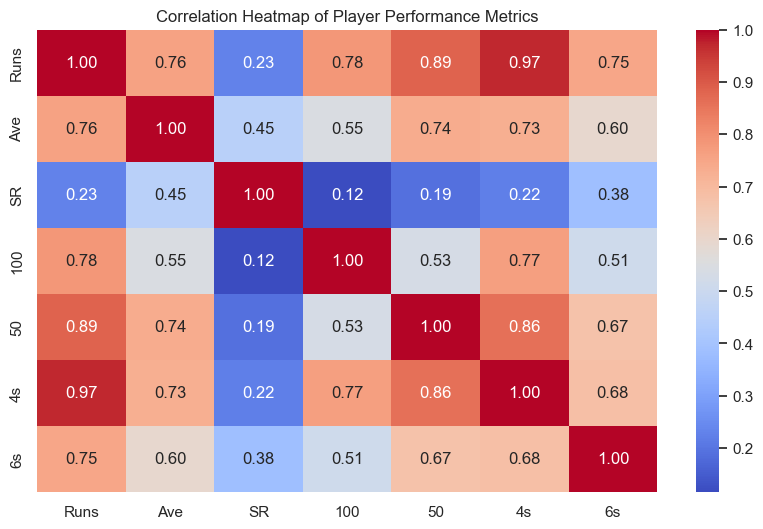

In [23]:
plt.figure(figsize=(10, 6))
corr_matrix = detailed_player_stats_bat[['Runs', 'Ave', 'SR', '100', '50', '4s', '6s']].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Player Performance Metrics")
plt.show()

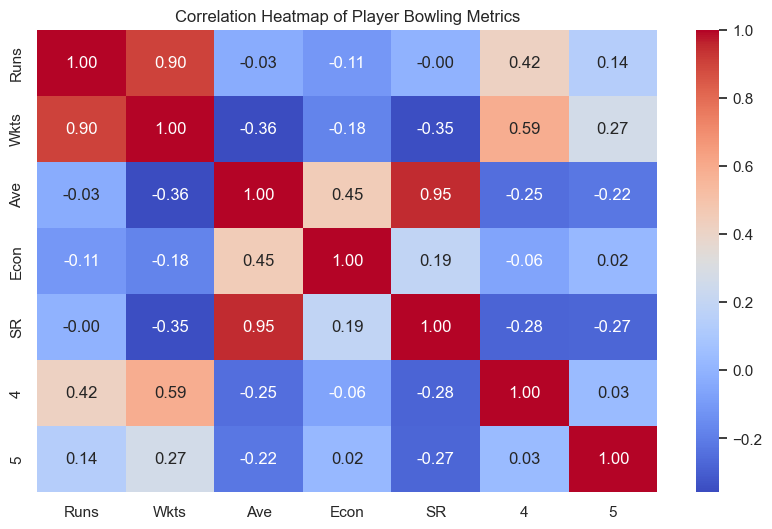

In [24]:
plt.figure(figsize=(10, 6))
corr_matrix = detailed_player_stats_bowl[['Runs', 'Wkts', 'Ave', 'Econ', 'SR', '4', '5']].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Player Bowling Metrics")
plt.show()

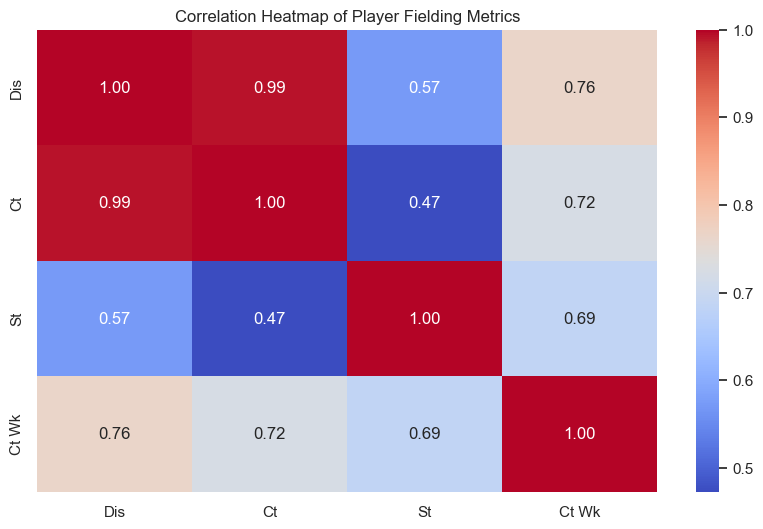

In [25]:
plt.figure(figsize=(10, 6))
corr_matrix = detailed_player_stats_field[['Dis', 'Ct', 'St', 'Ct Wk']].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Player Fielding Metrics")
plt.show()

# History

In [26]:
batting_players = detailed_player_stats_bat['Player'].unique()
bowling_players = detailed_player_stats_bowl['Player'].unique()
fielding_players = detailed_player_stats_field['Player'].unique()

ODIplayers = np.unique(np.concatenate([batting_players, bowling_players, fielding_players]))

len(ODIplayers)

192

In [32]:
ODIplayers

array(['A Mishra', 'AB de Villiers', 'AD Hales', 'AF Milne', 'AJ Finch',
       'AM Phangiso', 'AM Rahane', 'AN Cook', 'AP Devcich', 'AR Patel',
       'AT Rayudu', 'Abdur Razzak', 'Abdur Rehman', 'Abul Hasan',
       'Afsar Zazai', 'Aftab Alam', 'Ahmed Shehzad', 'Al-Amin Hossain',
       'Amir Hamza', 'Anamul Haque', 'Anwar Ali', 'Arafat Sunny',
       'Asad Shafiq', 'Asghar Afghan', 'B Kumar', 'BA Stokes',
       'BB McCullum', 'BCJ Cutting', 'BJ Haddin', 'Bilawal Bhatti',
       'CA Pujara', 'CJ Anderson', 'CJ Jordan', 'CJ McKay', 'CR Woakes',
       'DA Miller', 'DA Warner', 'DG Brownlie', 'DL Vettori',
       'DS Kulkarni', 'DT Christian', 'DW Steyn', 'Dawlat Zadran',
       'EJG Morgan', 'F Behardien', 'F du Plessis', 'Fareed Ahmad',
       'Fawad Alam', 'GJ Bailey', 'GJ Maxwell', 'GS Ballance',
       'Gulbadin Naib', 'HF Gurney', 'HK Bennett', 'HM Amla',
       'Hamid Hassan', 'Haris Sohail', 'Hashmatullah Shahidi', 'I Sharma',
       'IR Bell', 'Imran Tahir', 'Imrul Kayes', 'J

In [28]:
# Ensure all columns are numeric where needed
detailed_player_stats_bat['Runs'] = pd.to_numeric(detailed_player_stats_bat['Runs'], errors='coerce')
detailed_player_stats_bat['SR'] = pd.to_numeric(detailed_player_stats_bat['SR'], errors='coerce')
detailed_player_stats_bat['6s'] = pd.to_numeric(detailed_player_stats_bat['6s'], errors='coerce')
detailed_player_stats_bat['4s'] = pd.to_numeric(detailed_player_stats_bat['4s'], errors='coerce')
detailed_player_stats_bat['0'] = pd.to_numeric(detailed_player_stats_bat['0'], errors='coerce')

detailed_player_stats_bowl['Runs'] = pd.to_numeric(detailed_player_stats_bowl['Runs'], errors='coerce')
detailed_player_stats_bowl['Wkts'] = pd.to_numeric(detailed_player_stats_bowl['Wkts'], errors='coerce')
detailed_player_stats_bowl['Econ'] = pd.to_numeric(detailed_player_stats_bowl['Econ'], errors='coerce')
detailed_player_stats_bowl['SR'] = pd.to_numeric(detailed_player_stats_bowl['SR'], errors='coerce')
detailed_player_stats_bowl['4'] = pd.to_numeric(detailed_player_stats_bowl['4'], errors='coerce')
detailed_player_stats_bowl['5'] = pd.to_numeric(detailed_player_stats_bowl['5'], errors='coerce')

detailed_player_stats_field['Dis'] = pd.to_numeric(detailed_player_stats_field['Dis'], errors='coerce')
detailed_player_stats_field['Ct'] = pd.to_numeric(detailed_player_stats_field['Ct'], errors='coerce')
detailed_player_stats_field['St'] = pd.to_numeric(detailed_player_stats_field['St'], errors='coerce')
detailed_player_stats_field['Ct Wk'] = pd.to_numeric(detailed_player_stats_field['Ct Wk'], errors='coerce')
detailed_player_stats_field['MD'] = pd.to_numeric(detailed_player_stats_field['MD'], errors='coerce')

# Re-run the aggregation
player_stats_bat_summary = detailed_player_stats_bat.groupby('Player').agg(
    average_runs=('Runs', 'mean'),
    max_runs=('Runs', 'max'),
    min_runs=('Runs', 'min'),
    average_strike_rate=('SR', 'mean'),
    max_strike_rate=('SR', 'max'),
    min_strike_rate=('SR', 'min'),
    average_6s=('6s', 'mean'),
    max_6s=('6s', 'max'),
    min_6s=('6s', 'min'),
    average_4s=('4s', 'mean'),
    max_4s=('4s', 'max'),
    min_4s=('4s', 'min'),
    average_0s=('0', 'mean'),
    max_0s=('0', 'max'),
    min_0s=('0', 'min')
).reset_index()

player_stats_bowl_summary = detailed_player_stats_bowl.groupby('Player').agg(
    average_runs=('Runs', 'mean'),
    max_runs=('Runs', 'max'),
    min_runs=('Runs', 'min'),
    average_wickets=('Wkts', 'mean'),
    max_wickets=('Wkts', 'max'),
    min_wickets=('Wkts', 'min'),
    average_eco=('Econ', 'mean'),
    max_eco=('Econ', 'max'),
    min_eco=('Econ', 'min'),
    average_sr=('SR', 'mean'),
    max_sr=('SR', 'max'),
    min_sr=('SR', 'min'),
    average_4w=('4', 'mean'),
    max_4w=('4', 'max'),
    min_4w=('4', 'min'),
    average_5w=('5', 'mean'),
    max_5w=('5', 'max'),
    min_5w=('5', 'min')
).reset_index()

player_stats_field_summary = detailed_player_stats_field.groupby('Player').agg(
    average_dis=('Dis', 'mean'),
    max_dis=('Dis', 'max'),
    min_dis=('Dis', 'min'),
    average_ct=('Ct', 'mean'),
    max_ct=('Ct', 'max'),
    min_ct=('Ct', 'min'),
    average_st=('St', 'mean'),
    max_st=('St', 'max'),
    min_st=('St', 'min'),
    average_ct_wk=('Ct Wk', 'mean'),
    max_ct_wk=('Ct Wk', 'max'),
    min_ct_wk=('Ct Wk', 'min'),
    average_md=('MD', 'mean'),
    max_md=('MD', 'max'),
    min_md=('MD', 'min')
).reset_index()

# Merge summaries
player_stats_summary = player_stats_bat_summary.merge(player_stats_bowl_summary, on='Player', how='outer')\
                                                .merge(player_stats_field_summary, on='Player', how='outer')

player_stats_summary.head()

,Player,average_runs_x,max_runs_x,min_runs_x,average_strike_rate,max_strike_rate,min_strike_rate,average_6s,max_6s,min_6s,...,min_ct,average_st,max_st,min_st,average_ct_wk,max_ct_wk,min_ct_wk,average_md,max_md,min_md
0,A Mishra,10.0,10,10,33.33,33.33,33.33,0.0,0,0,...,1,0.0,0,0,0.0,0.0,0.0,NaN,NaN,NaN
1,AB de Villiers,879.0,879,879,114.45,114.45,114.45,14.0,14,14,...,8,0.0,0,0,0.0,0.0,0.0,NaN,NaN,NaN
2,AD Hales,126.0,126,126,70.39,70.39,70.39,1.0,1,1,...,1,0.0,0,0,0.0,0.0,0.0,NaN,NaN,NaN
3,AF Milne,<NA>,<NA>,<NA>,NaN,NaN,NaN,<NA>,<NA>,<NA>,...,4,0.0,0,0,0.0,0.0,0.0,NaN,NaN,NaN
4,AJ Finch,790.0,790,790,84.04,84.04,84.04,13.0,13,13,...,6,0.0,0,0,0.0,0.0,0.0,NaN,NaN,NaN


In [29]:
player_stats_summary.isna().sum()

Player                   0
average_runs_x          11
max_runs_x              11
min_runs_x              11
average_strike_rate     11
max_strike_rate         11
min_strike_rate         11
average_6s              11
max_6s                  11
min_6s                  11
average_4s              11
max_4s                  11
min_4s                  11
average_0s              11
max_0s                  11
min_0s                  11
average_runs_y          53
max_runs_y              53
min_runs_y              53
average_wickets         53
max_wickets             53
min_wickets             53
average_eco             54
max_eco                 54
min_eco                 54
average_sr              75
max_sr                  75
min_sr                  75
average_4w              53
max_4w                  53
min_4w                  53
average_5w              53
max_5w                  53
min_5w                  53
average_dis              1
max_dis                  1
min_dis                  1
a

In [30]:
len(player_stats_summary)

192

In [33]:
champions_trophy_2025_squads = {
    "Bangladesh": [
        "Najmul Hossain Shanto (c)",
        "Nasum Ahmed",
        "Taskin Ahmed",
        "Jaker Ali (wk)",
        "Parvez Hossain Emon",
        "Tanzid Hasan",
        "Rishad Hossain",
        "Towhid Hridoy",
        "Mahmudullah",
        "Mehidy Hasan Miraz",
        "Mushfiqur Rahim (wk)",
        "Mustafizur Rahman",
        "Nahid Rana",
        "Tanzim Hasan Sakib",
        "Soumya Sarkar"
    ],
    "India": [
        "Rohit Sharma (c)",
        "Shubman Gill (vc)",
        "Jasprit Bumrah",
        "Shreyas Iyer",
        "Ravindra Jadeja",
        "Yashasvi Jaiswal",
        "Virat Kohli",
        "Hardik Pandya",
        "Rishabh Pant (wk)",
        "Axar Patel",
        "KL Rahul (wk)",
        "Mohammed Shami",
        "Arshdeep Singh",
        "Washington Sundar",
        "Kuldeep Yadav"
    ],
    "New Zealand": [
        "Mitchell Santner (c)",
        "Michael Bracewell",
        "Mark Chapman",
        "Devon Conway (wk)",
        "Lockie Ferguson",
        "Matt Henry",
        "Tom Latham (wk)",
        "Daryl Mitchell",
        "Glenn Phillips",
        "Rachin Ravindra",
        "William O'Rourke",
        "Ben Sears",
        "Nathan Smith",
        "Kane Williamson",
        "Will Young"
    ],
    "Pakistan": [
        "Mohammad Rizwan (c, wk)",
        "Salman Ali Agha (vc)",
        "Shaheen Afridi",
        "Abrar Ahmed",
        "Faheem Ashraf",
        "Babar Azam",
        "Kamran Ghulam",
        "Mohammad Hasnain",
        "Usman Khan",
        "Haris Rauf",
        "Khushdil Shah",
        "Naseem Shah",
        "Saud Shakeel",
        "Tayyab Tahir",
        "Fakhar Zaman"
    ],
    "Australia": [
        "Pat Cummins (c)",
        "Alex Carey (wk)",
        "Travis Head",
        "Marnus Labuschagne",
        "Glenn Maxwell",
        "Mitchell Marsh",
        "Marcus Stoinis",
        "Adam Zampa",
        "Josh Hazlewood",
        "Mitchell Starc",
        "David Warner",
        "Steve Smith",
        "Cameron Green",
        "Nathan Ellis",
        "Aaron Hardie"
    ],
    "England": [
        "Jos Buttler (c, wk)",
        "Moeen Ali",
        "Jonny Bairstow (wk)",
        "Harry Brook",
        "Sam Curran",
        "Ben Duckett",
        "Liam Livingstone",
        "Dawid Malan",
        "Adil Rashid",
        "Joe Root",
        "Jason Roy",
        "Phil Salt (wk)",
        "Chris Woakes",
        "Mark Wood",
        "Reece Topley"
    ],
    "South Africa": [
        "Temba Bavuma (c)",
        "Quinton de Kock (wk)",
        "Aiden Markram",
        "Rassie van der Dussen",
        "David Miller",
        "Heinrich Klaasen (wk)",
        "Marco Jansen",
        "Kagiso Rabada",
        "Anrich Nortje",
        "Lungi Ngidi",
        "Keshav Maharaj",
        "Tabraiz Shamsi",
        "Reeza Hendricks",
        "Andile Phehlukwayo",
        "Dwaine Pretorius"
    ],
    "Afghanistan": [
        "Hashmatullah Shahidi (c)",
        "Rahmanullah Gurbaz (wk)",
        "Ibrahim Zadran",
        "Rashid Khan",
        "Mohammad Nabi",
        "Najibullah Zadran",
        "Azmatullah Omarzai",
        "Mujeeb Ur Rahman",
        "Fazalhaq Farooqi",
        "Naveen-ul-Haq",
        "Gulbadin Naib",
        "Rahmat Shah",
        "Karim Janat",
        "Sharafuddin Ashraf",
        "Hazratullah Zazai"
    ]
}